In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dataframe:

### Vendas por tempo de experiência:

In [3]:
df = {
    "tempo":[1,3,4,4,6,8,10,10,11,13],
    "vendas":[91,110,106,116,119,129,139,143,138,159],
}
df = pd.DataFrame(
    df
)

In [4]:
display(df.head())

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


### Alunos Aprovados:

In [5]:
path = r'../../../data/aprovacao_alunos.xlsx'
df_alunos = pd.read_excel(
    io=path
)

In [6]:
display(df_alunos.head())

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


### Limiti de credito:

In [7]:
path = r'../../../data/Limite_Credito.xlsx'
df_limite = pd.read_excel(
    io=path
)

In [8]:
display(df_limite.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


### Lucro Escola DNC:

In [9]:
path = r'../../../data/Exercicio_Lucro.xlsx'
df_lucro = pd.read_excel(
    io=path
)

In [10]:
display(df_lucro.head())

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


### Limiti de credito escolaridade:

In [11]:
path = r'../../../data/Escolaridade_Limite_Credito.xlsx'
df_escolaridade = pd.read_excel(
    io=path
)

In [12]:
display(df_escolaridade.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


### Limiti de credito dummy:

In [13]:
path = r'../../../data/Limite_Credito_Dummy.xlsx'
df_dummy = pd.read_excel(
    io=path
)

In [14]:
display(df_escolaridade.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


### Imóveis:

In [15]:
path = r'../../../data/imoveis.xlsx'
df_imoveis = pd.read_excel(
    io=path
)

In [16]:
display(df_imoveis.head())

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


### Alunos aprovados 2015 e 2016:

In [17]:
path = r'../../../data/aprovacao_alunos_2015_2016.xlsx'
df_aprovados = pd.read_excel(
    io=path
)

In [18]:
display(df_aprovados.head())

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


### Limiti com varios Dummys:

In [ ]:
path = r'../../../data/Limite_Credito.xlsx'
df_limiti_dymmy = pd.read_excel(
    io=path
)

In [ ]:
display(df_limiti_dymmy)

# Machine Learning:

## Regressão Linear:

### Código:

In [19]:
class RegressãoLinear():
    def treinamento(self):
        pass

    def previsão(self):
        pass

    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão - Tempo x Venda")
        plt.show()

    def verificando_a_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe

    def modelo_de_ols(self, x, y):
        x = sm.add_constant(x)
        y = y
        treinamento = sm.OLS(y, x).fit()
        return treinamento
    
    def resumo_do_modelo(self, modelo):
        print(modelo.summary())

if __name__ == '__main__':
    regressão_linear = RegressãoLinear()

### Output:

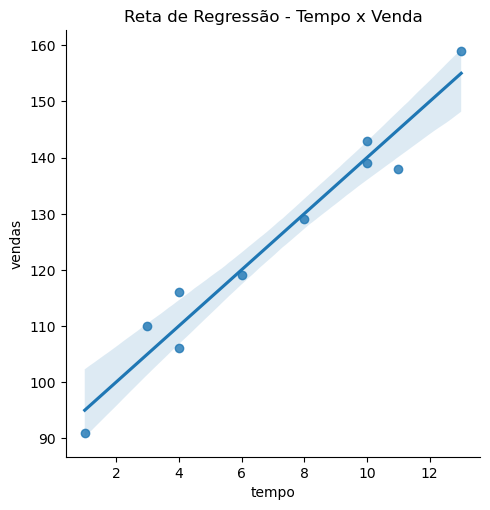

In [20]:
regressão_linear.gráfico_de_reta_linear(
    dataframe=df,
    x='tempo',
    y='vendas'
)

In [21]:
regressão_linear.verificando_a_correlação(dataframe=df).head()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [22]:
treinando_modelo_ols = regressão_linear.modelo_de_ols(
    x=df.tempo,
    y=df.vendas
)

### Prevendo as vendas x tempo:

In [23]:
df['Y_previsto'] = treinando_modelo_ols.predict()

### Verificando o residuo:

In [24]:
df["residuo"] = df["Y_previsto"] - df["vendas"]

In [25]:
df.head(5)

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


In [26]:
regressão_linear.resumo_do_modelo(
    modelo=treinando_modelo_ols
)

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.22e-06
Time:                        20:45:52   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Execício:

### Código:

In [27]:
class ExercíciosRegressãoLinear():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_a_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

    def identificando_outliers(self, dataframe):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        sns.boxplot(data=dataframe)
        plt.show()


    def gráfico_de_correlação(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_reta_linear(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    # Modeling:
    def treinamento(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'r_quadrado: {r2}')

        return treinamento, y_pred, y_test
    
    def gráfico_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        print(y_pred)
        return y_pred

    def resumo_do_modelo(self, modelo):
        print(modelo.summary())

if __name__ == '__main__':
    exercícios_regressão_linear = ExercíciosRegressãoLinear()

### Output:

## Entendimento dos dados:

In [28]:
exercícios_regressão_linear.verificando_as_dimensões_do_dataframe(dataframe=df_alunos)

Linhas: 27 
Colunas: 3


In [29]:
exercícios_regressão_linear.descrição(dataframe=df_alunos)

,ano_2015,ano_2016
count,27.00,27.00
mean,79.33,80.19
std,4.97,4.82
min,68.00,70.00
25%,76.00,76.50
50%,80.00,81.00
75%,81.50,82.50
max,89.00,91.00


In [30]:
exercícios_regressão_linear.verificando_valores_nulos(dataframe=df_alunos)

,Quantidade,Porcentagem
UF,0,0.0
ano_2015,0,0.0
ano_2016,0,0.0


In [31]:
exercícios_regressão_linear.verificando_valores_duplicados(dataframe=df_alunos)

,Quantidade,Porcentagem
UF,0,0.00%
ano_2015,12,44.44%
ano_2016,15,55.56%


In [32]:
exercícios_regressão_linear.verificando_tipos(dataframe=df_alunos)

,Tipos
UF,object
ano_2015,int64
ano_2016,int64


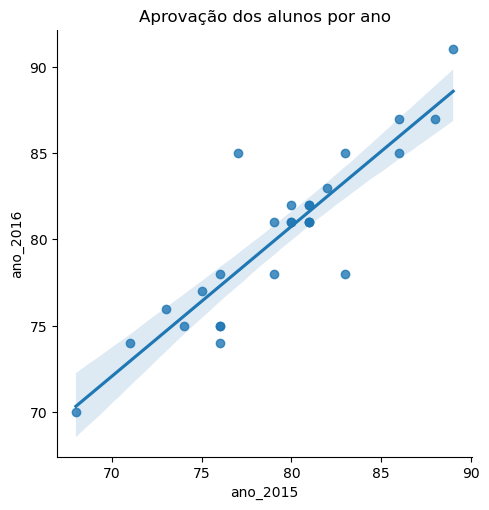

In [33]:
exercícios_regressão_linear.gráfico_de_reta_linear(
    dataframe=df_alunos,
    x='ano_2015',
    y='ano_2016',
    titulo='Aprovação dos alunos por ano'
)

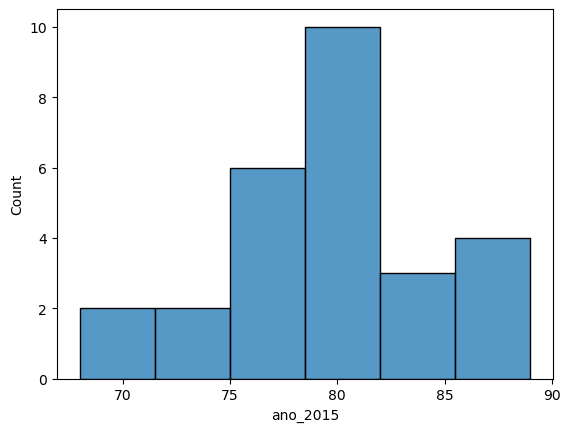

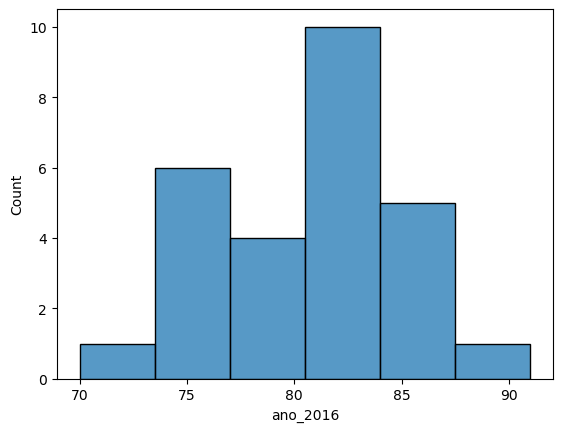

In [34]:
for ano in ['ano_2015', 'ano_2016']:
    exercícios_regressão_linear.verificando_a_distribuição(dataframe=df_alunos, coluna=ano)

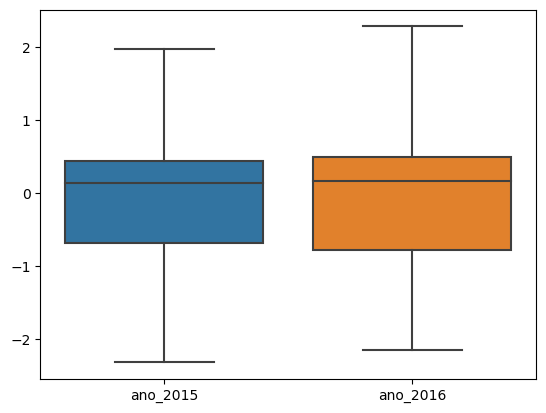

In [35]:
exercícios_regressão_linear.identificando_outliers(dataframe=df_alunos)

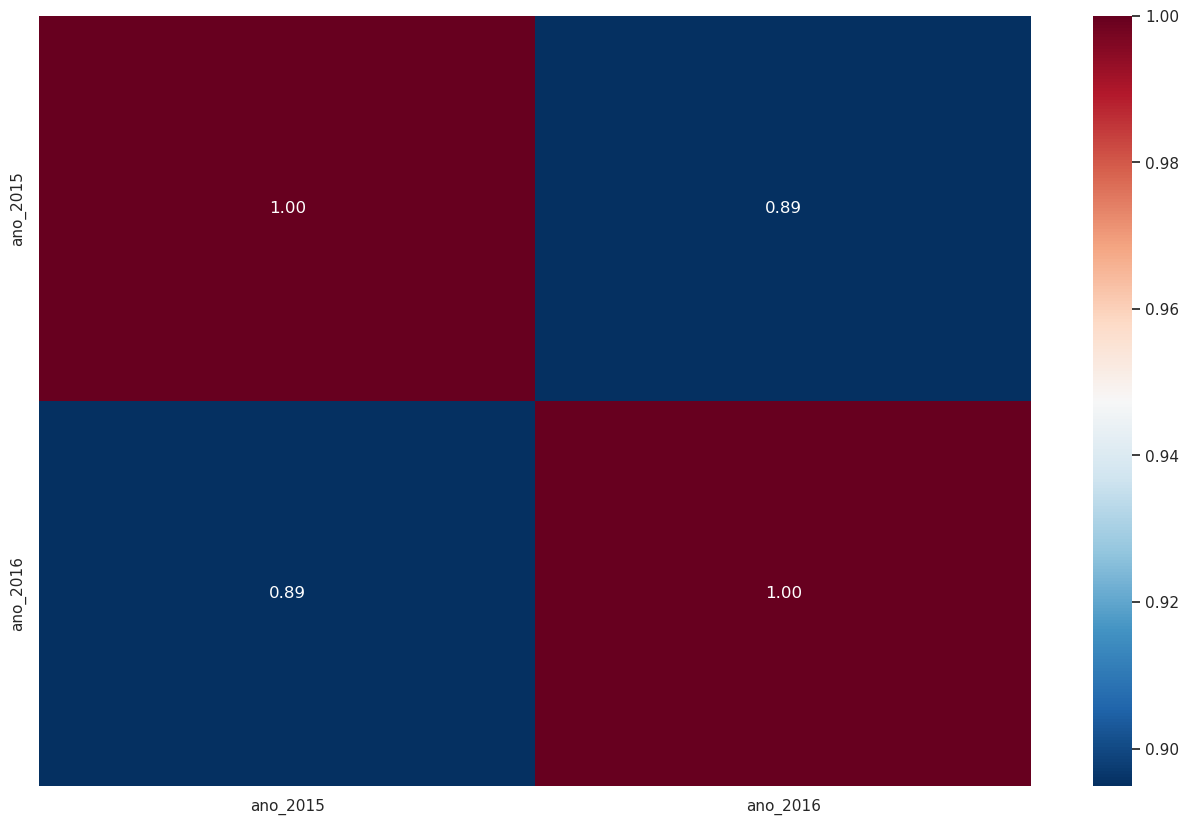

In [36]:
exercícios_regressão_linear.gráfico_de_correlação(dataframe=df_alunos)

## Criação do modelo:

In [37]:
x = df_alunos[['ano_2015']]
y = df_alunos['ano_2016']

treinamento_exercícios, y_pred, y_test = exercícios_regressão_linear.treinamento(
    x=x,
    y=y
)

r_quadrado: 0.920254651634064


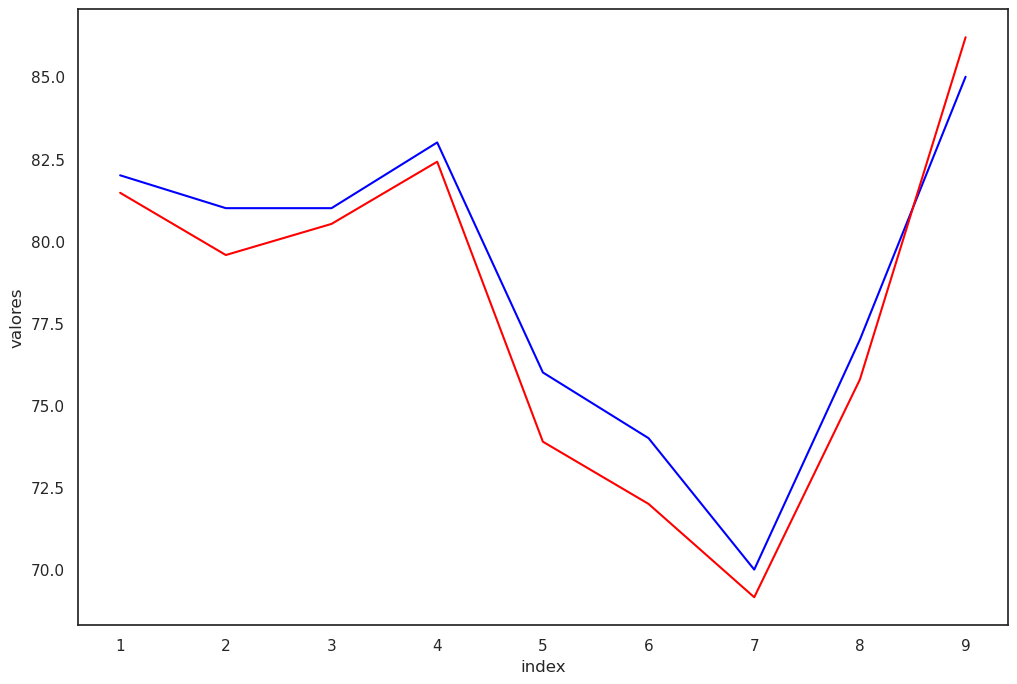

In [38]:
exercícios_regressão_linear.gráfico_de_linha(
    y_pred=y_pred,
    y_true=y_test
)

In [39]:
entrada = df_alunos[['ano_2015']]

df_alunos['predition_2016'] = exercícios_regressão_linear.previsão(
    treinamento=treinamento_exercícios,
    entrada=entrada
)

[77.68021486 79.57385855 83.36114593 81.46750224 73.89292748 76.73339302
 81.46750224 81.46750224 80.52068039 86.20161146 74.83974933 79.57385855
 89.04207699 75.78657117 71.9992838  76.73339302 81.46750224 80.52068039
 83.36114593 88.09525515 81.46750224 80.52068039 76.73339302 76.73339302
 69.15881826 86.20161146 82.41432408]


In [40]:
entrada = df_alunos[['ano_2016']]

df_alunos['predition_2017'] = exercícios_regressão_linear.previsão(
    treinamento=treinamento_exercícios,
    entrada=entrada
)

[85.25478962 81.46750224 85.25478962 82.41432408 76.73339302 75.78657117
 82.41432408 81.46750224 81.46750224 85.25478962 75.78657117 78.62703671
 90.93572068 77.68021486 74.83974933 75.78657117 81.46750224 81.46750224
 78.62703671 87.1484333  81.46750224 82.41432408 74.83974933 78.62703671
 71.05246195 87.1484333  83.36114593]


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ano_2016
Feature names seen at fit time, yet now missing:
- ano_2015

  warnings.warn(message, FutureWarning)


In [41]:
df_alunos["residuo_2016"] = df_alunos["predition_2016"] - df_alunos["ano_2016"]

In [42]:
df_alunos.head()

,UF,ano_2015,ano_2016,predition_2016,predition_2017,residuo_2016
0,Rondonia,77,85,77.680215,85.254790,-7.319785
1,Acre,79,81,79.573859,81.467502,-1.426141
2,Amazonas,83,85,83.361146,85.254790,-1.638854
3,Roraima,81,82,81.467502,82.414324,-0.532498
4,Para,73,76,73.892927,76.733393,-2.107073


## Regressão Linear Múltipla:

### Código:

In [43]:
class RegressãoLinearMúltipla():
    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    regressão_linear_múltipla = RegressãoLinearMúltipla()

### Output:

In [44]:
display(df_limite.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


In [45]:
regressão_linear_múltipla.verificando_correlação(dataframe=df_limite)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000


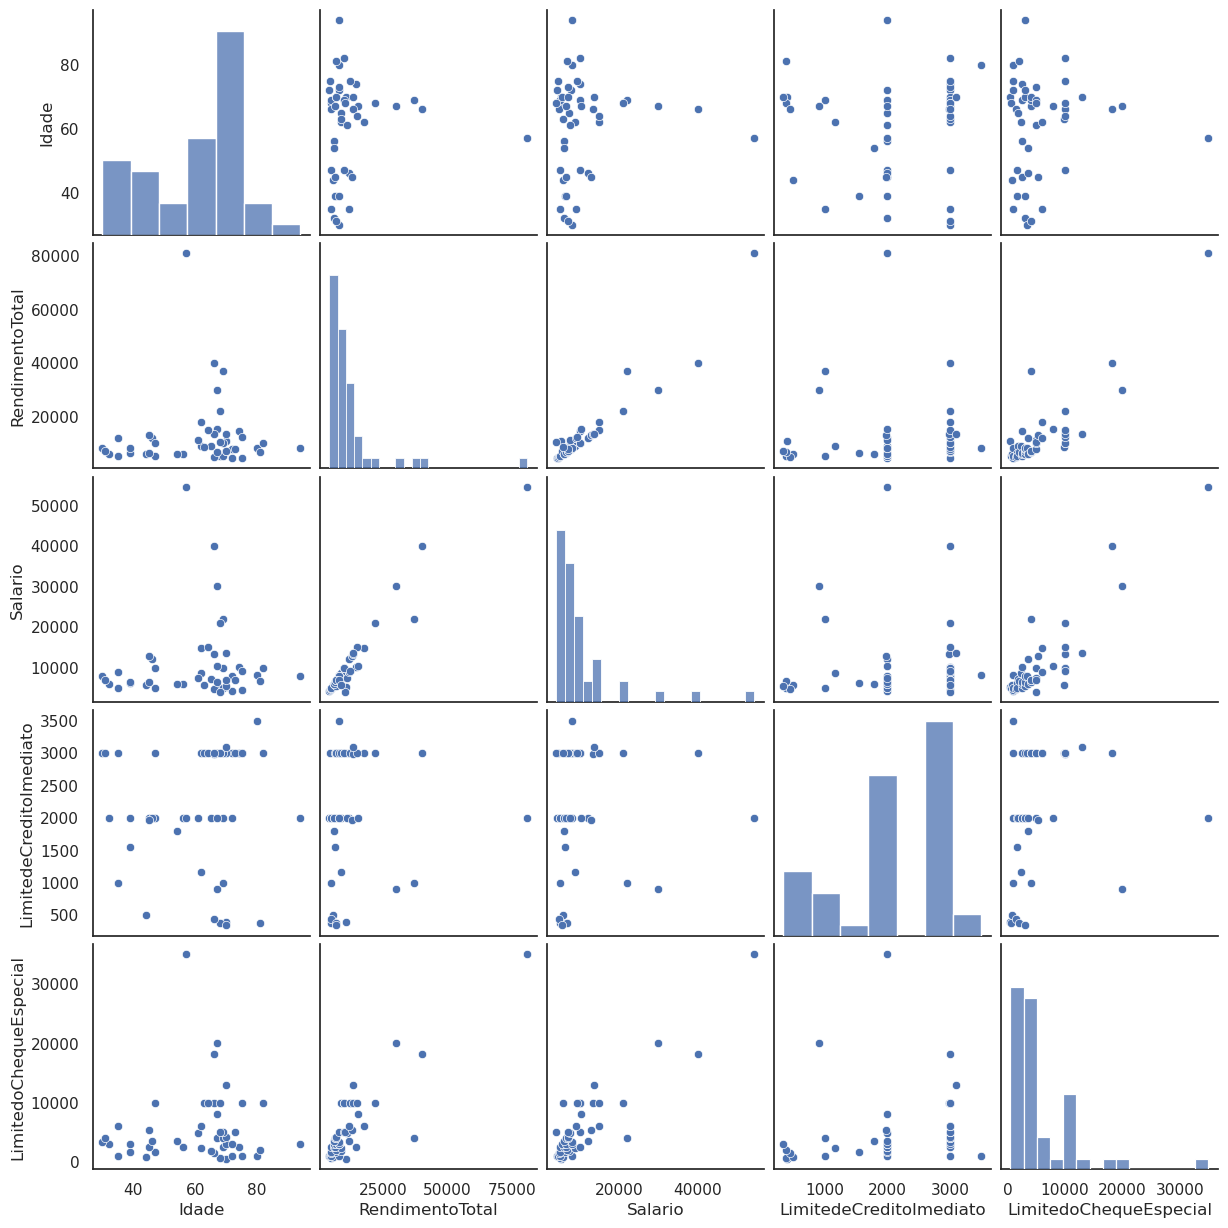

In [46]:
regressão_linear_múltipla.gráfico_de_correlação(dataframe=df_limite)

In [47]:
regressão_linear_múltipla.modelo_mrls(
    dataframe=df_limite,
    function='LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato'
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Fri, 02 Jun 2023   Prob (F-statistic):           2.92e-15
Time:                            20:45:58   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [48]:
regressão_linear_múltipla.modelo_mrls(
    dataframe=df_limite,
    function='LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato'
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Fri, 02 Jun 2023   Prob (F-statistic):           3.34e-16
Time:                            20:45:58   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [49]:
regressão_linear_múltipla.modelo_mrls(
    dataframe=df_limite,
    function='LimitedoChequeEspecial~Salario+LimitedeCreditoImediato'
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Fri, 02 Jun 2023   Prob (F-statistic):           3.66e-17
Time:                            20:45:58   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Execício:

### Código:

In [50]:
class ExercíciosRegressãoLinearMúltipla():
    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    exercícios_regressão_linear_múltipla = ExercíciosRegressãoLinearMúltipla()

### Output:

In [51]:
display(df_lucro.head())

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


In [52]:
exercícios_regressão_linear_múltipla.verificando_correlação(dataframe=df_lucro)

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
Investimento,1.000000,0.661913,0.243497,0.896767
Investimento_Mkt,0.661913,1.000000,-0.046715,0.716677
Gastos_Administrativos,0.243497,-0.046715,1.000000,0.200720
Lucro,0.896767,0.716677,0.200720,1.000000


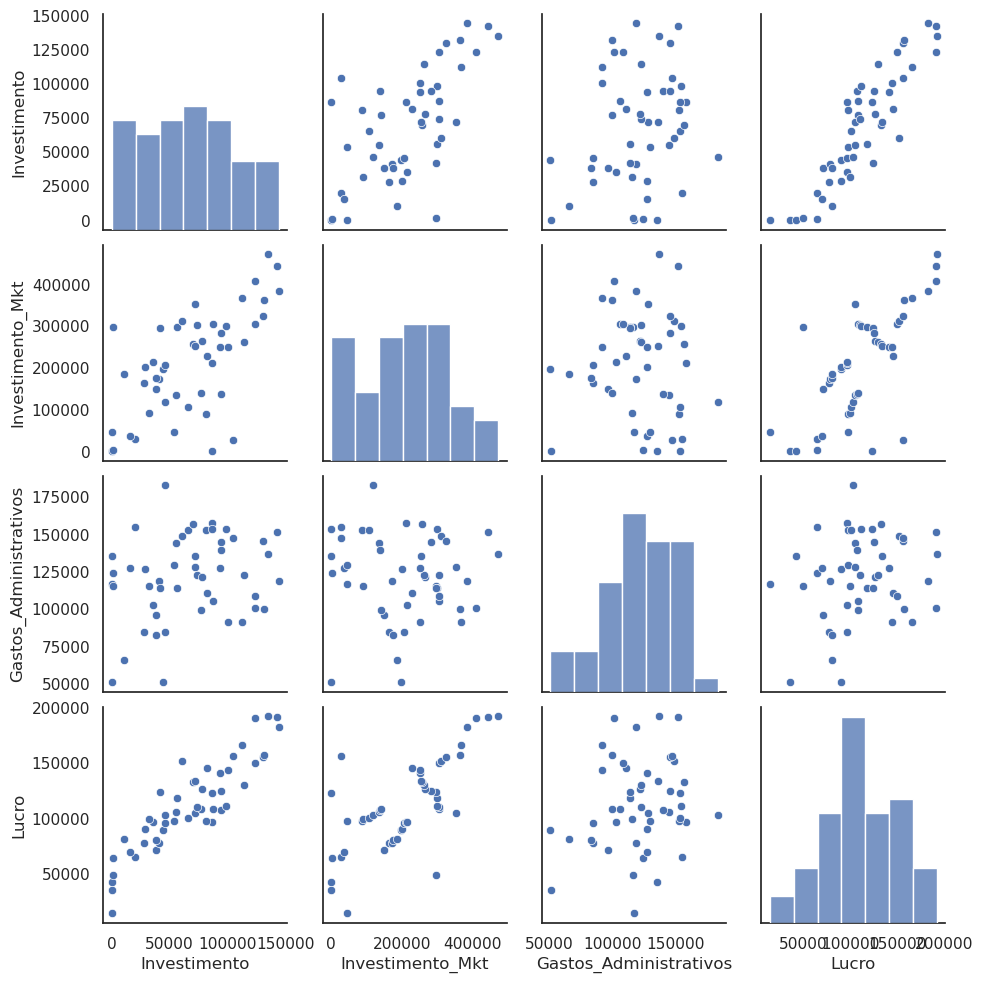

In [53]:
exercícios_regressão_linear_múltipla.gráfico_de_correlação_pairplot(dataframe=df_lucro)

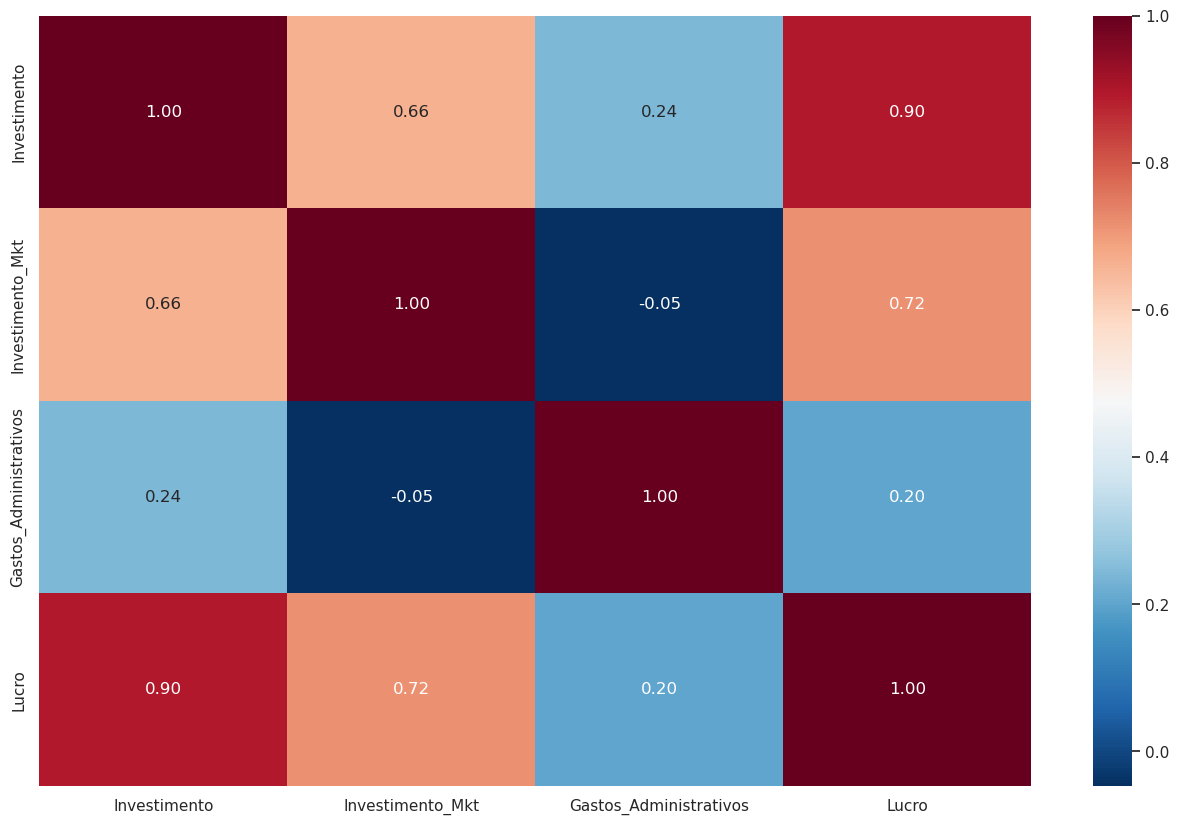

In [54]:
exercícios_regressão_linear_múltipla.gráfico_de_correlação_heatmap(dataframe=df_lucro)

In [55]:
df_lucro.columns

Index(['Investimento', 'Investimento_Mkt', 'Gastos_Administrativos', 'Lucro'], dtype='object')

In [56]:
exercícios_regressão_linear_múltipla.modelo_mrls(
    function='Lucro~Investimento+Investimento_Mkt',
    dataframe=df_lucro
)

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           7.01e-19
Time:                        20:46:01   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  

# Variáveis Dummy Prática:

### Código:

In [57]:
class VariáveisDummyPrática():
    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    variáveis_dummy_prática = VariáveisDummyPrática()

### Output:

In [58]:
display(df_escolaridade.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


In [59]:
df_escolaridade_dummy = variáveis_dummy_prática.dummy(dataframe=df_escolaridade, colunas=['Escolaridade'])

In [60]:
variáveis_dummy_prática.verificando_correlação(dataframe=df_escolaridade_dummy)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
Idade,1.000000,0.066396,0.063227,0.064149,0.075883,-0.110892,0.110892
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191
Salario,0.063227,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310
Escolaridade_Fundamental_Medio,-0.110892,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000
Escolaridade_Superior_Pos,0.110892,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000


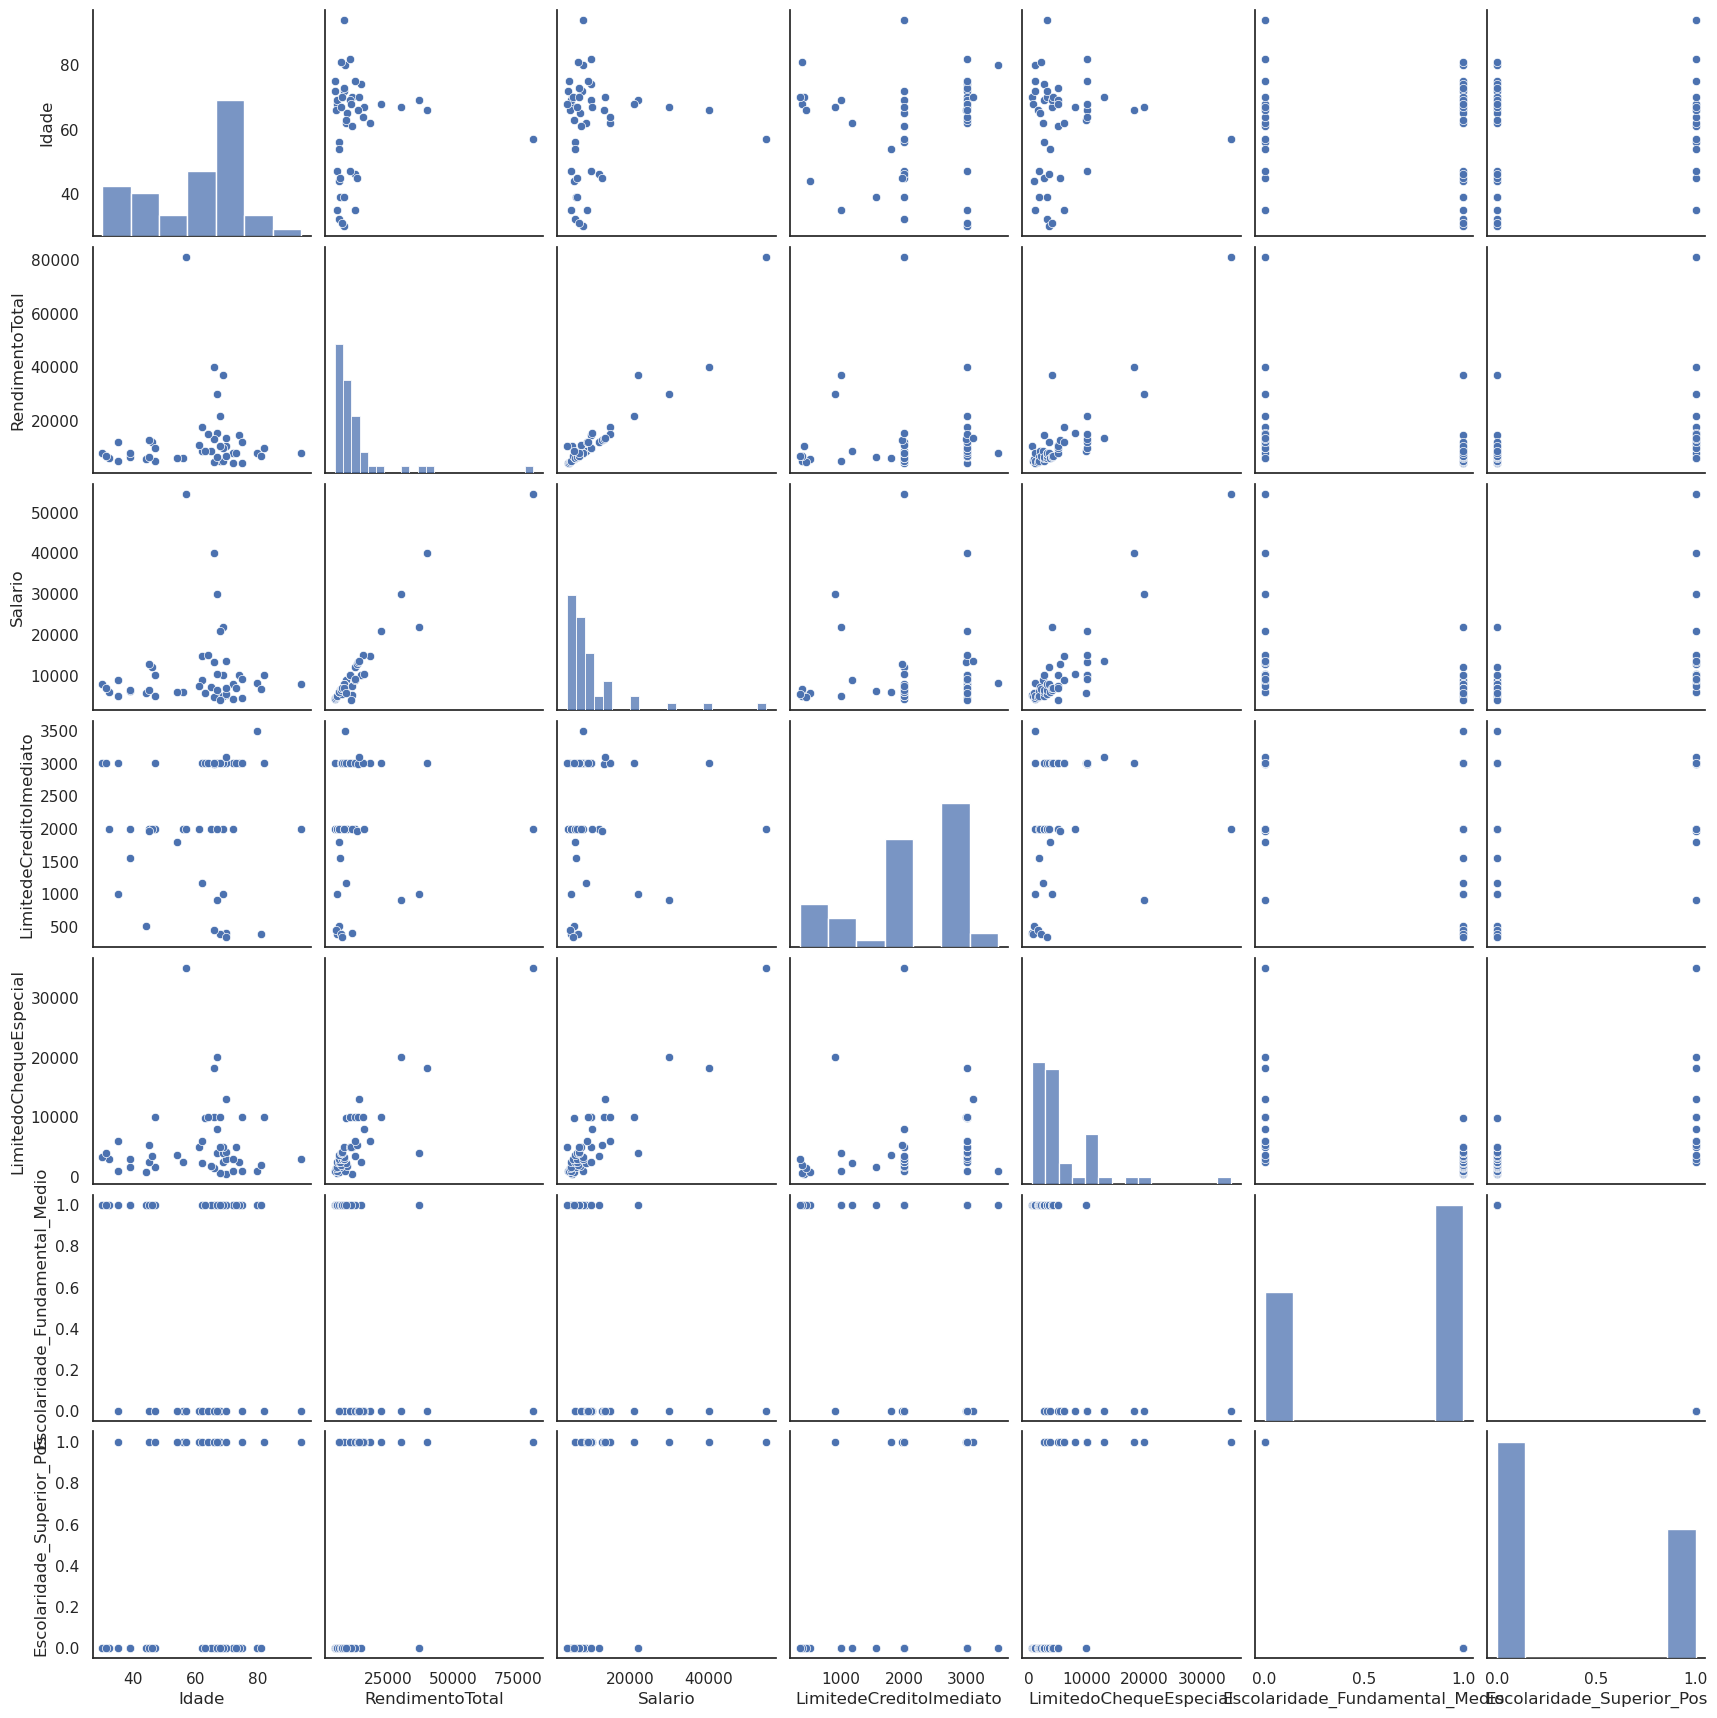

In [61]:
variáveis_dummy_prática.gráfico_de_correlação_pairplot(dataframe=df_escolaridade_dummy)

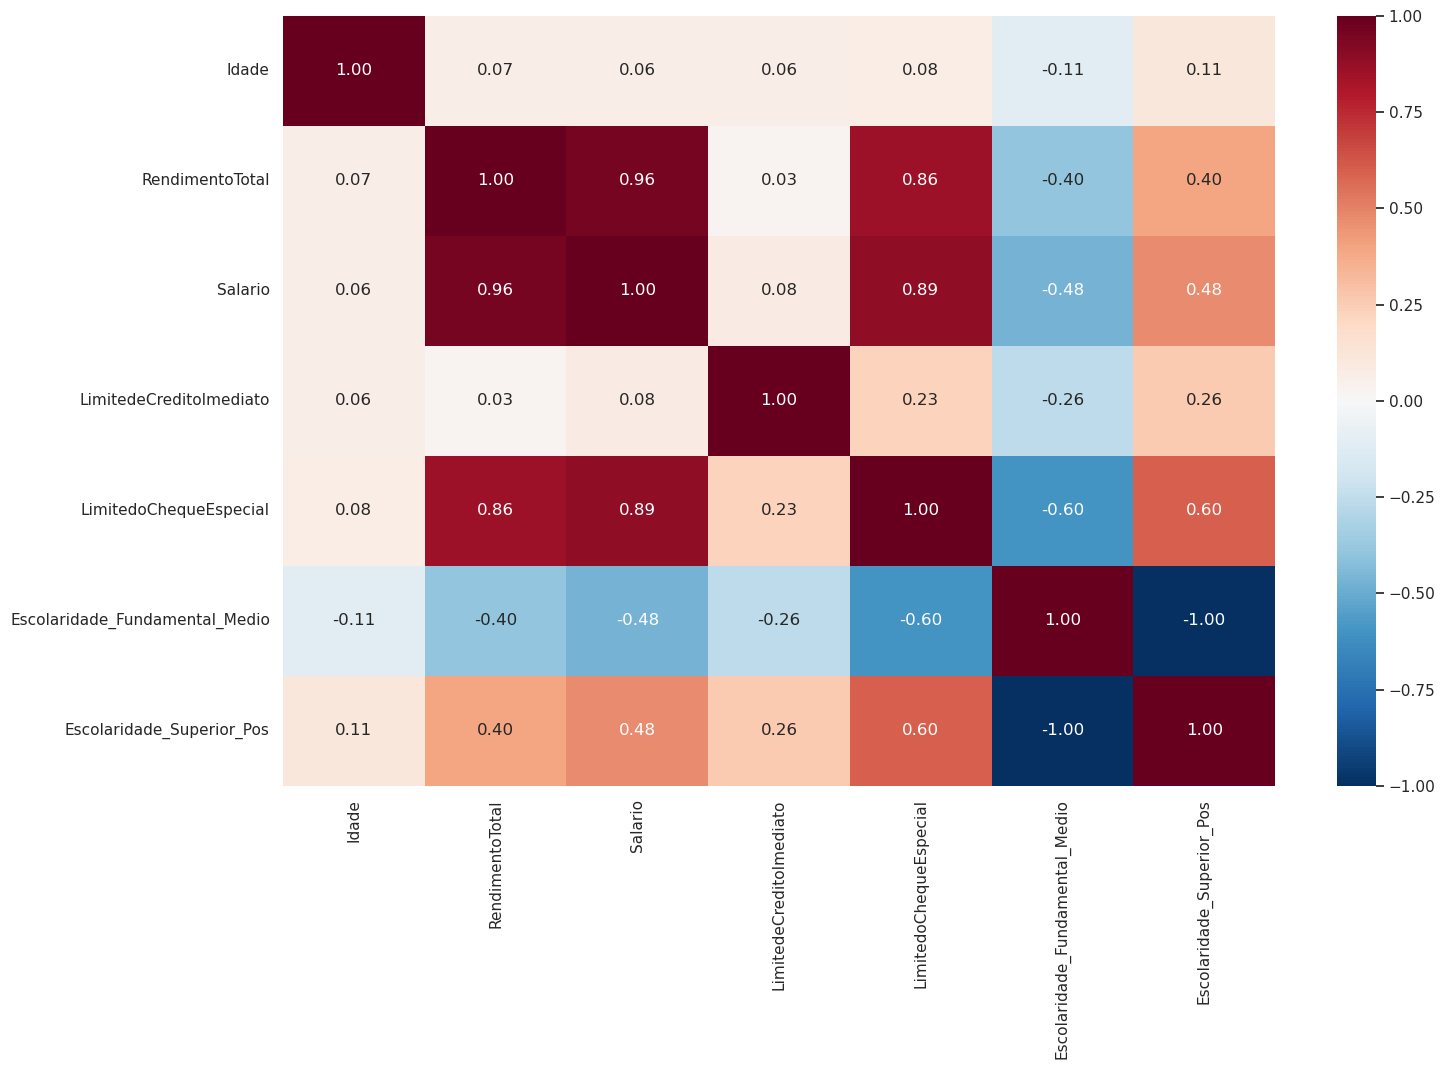

In [62]:
variáveis_dummy_prática.gráfico_de_correlação_heatmap(dataframe=df_escolaridade_dummy)

In [63]:
variáveis_dummy_prática.modelo_mrls(
    function='LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio-1',
    dataframe=df_escolaridade_dummy
)

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.915
Model:                                OLS   Adj. R-squared (uncentered):              0.909
Method:                     Least Squares   F-statistic:                              160.9
Date:                    Fri, 02 Jun 2023   Prob (F-statistic):                    4.57e-24
Time:                            20:46:08   Log-Likelihood:                         -442.01
No. Observations:                      48   AIC:                                      890.0
Df Residuals:                          45   BIC:                                      895.6
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                                     coef    std err          t      P>|t|      

## Execício:

### Código:

In [64]:
class ExecícioVariáveisDummyPrática():
    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    execício_variáveis_dummy_prática = ExecícioVariáveisDummyPrática()

### Output:

In [65]:
display(df_dummy.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [66]:
df_dummy = execício_variáveis_dummy_prática.dummy(
    dataframe=df_dummy,
    colunas=['Escolaridade', 'Gênero', 'Região']
)

In [67]:
execício_variáveis_dummy_prática.verificando_correlação(dataframe=df_dummy)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Gênero_RJ,Gênero_SP,Região_F,Região_M
Idade,1.000000,0.239445,0.213186,0.057183,0.228117,-0.150088,0.150088,-0.196052,0.196052,-0.121217,0.121217
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191,-0.177798,0.177798,-0.406241,0.406241
Salario,0.213186,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479,-0.242621,0.242621,-0.424335,0.424335
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433,-0.001145,0.001145,-0.473326,0.473326
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310,-0.312566,0.312566,-0.591779,0.591779
Escolaridade_Fundamental_Medio,-0.150088,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000,0.237508,-0.237508,0.602464,-0.602464
Escolaridade_Superior_Pos,0.150088,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000,-0.237508,0.237508,-0.602464,0.602464
Gênero_RJ,-0.196052,-0.177798,-0.242621,-0.001145,-0.312566,0.237508,-0.237508,1.000000,-1.000000,-0.167248,0.167248
Gênero_SP,0.196052,0.177798,0.242621,0.001145,0.312566,-0.237508,0.237508,-1.000000,1.000000,0.167248,-0.167248
Região_F,-0.121217,-0.406241,-0.424335,-0.473326,-0.591779,0.602464,-0.602464,-0.167248,0.167248,1.000000,-1.000000


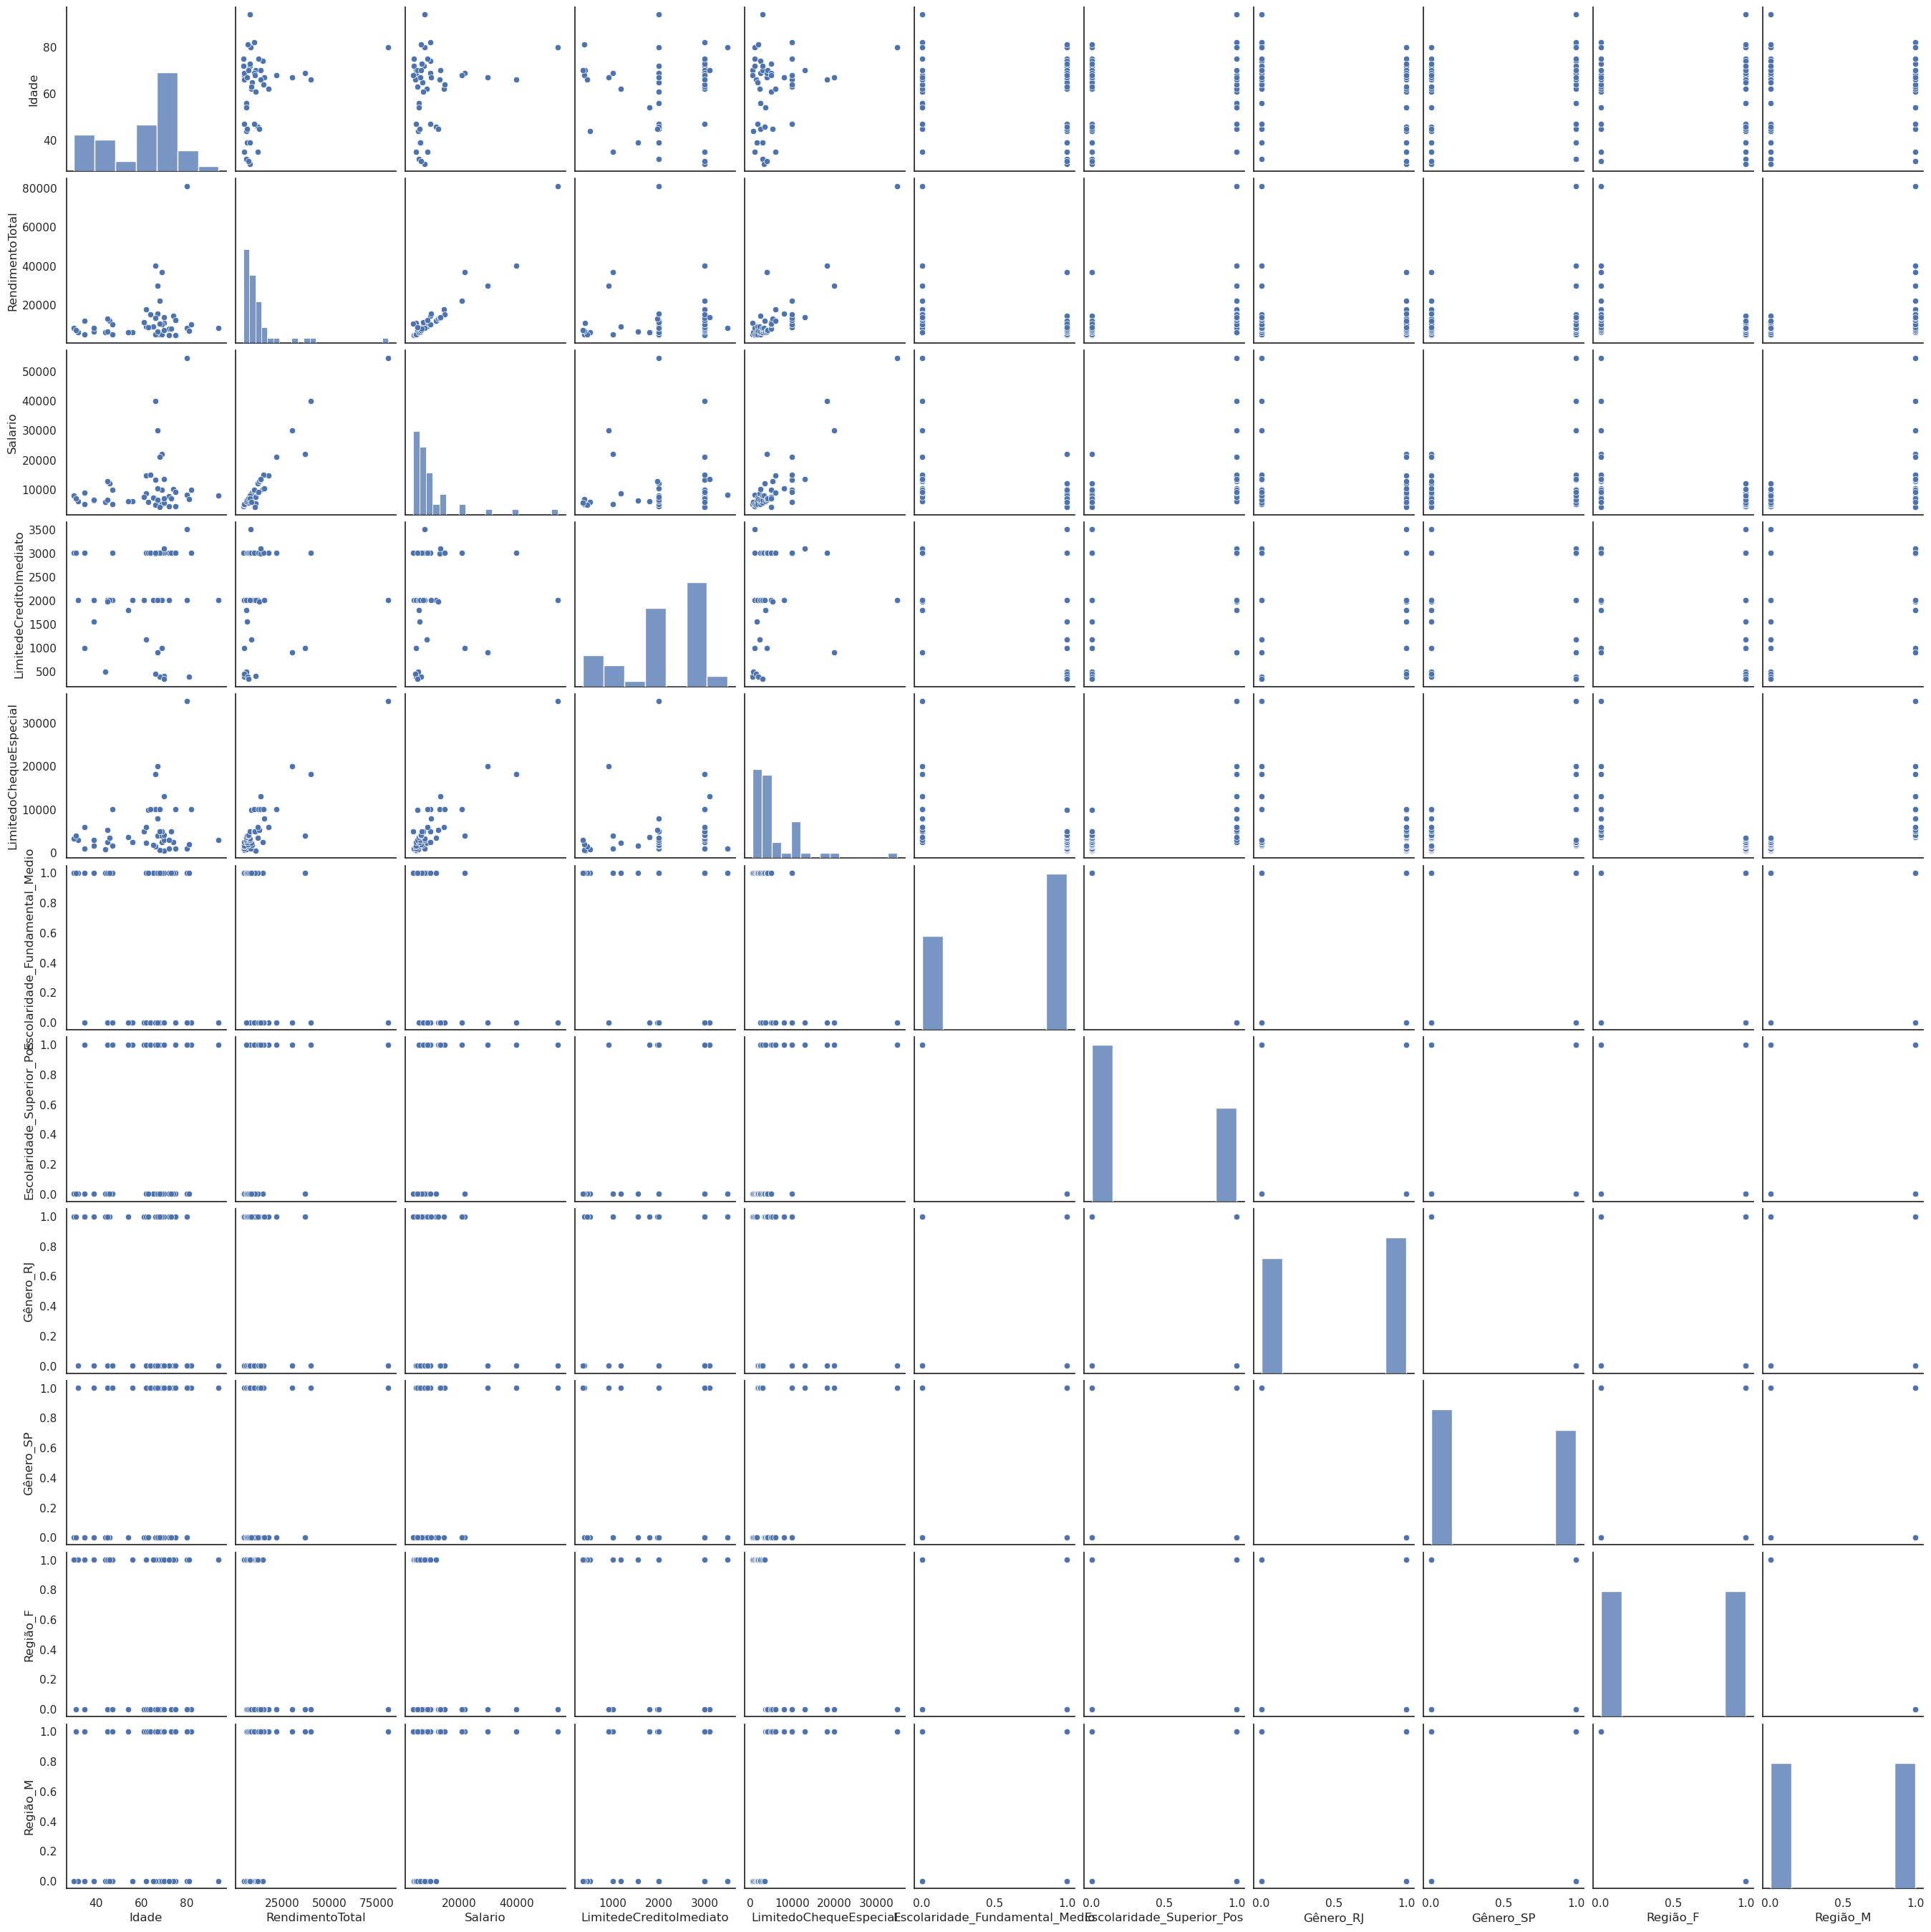

In [68]:
execício_variáveis_dummy_prática.gráfico_de_correlação_pairplot(dataframe=df_dummy)

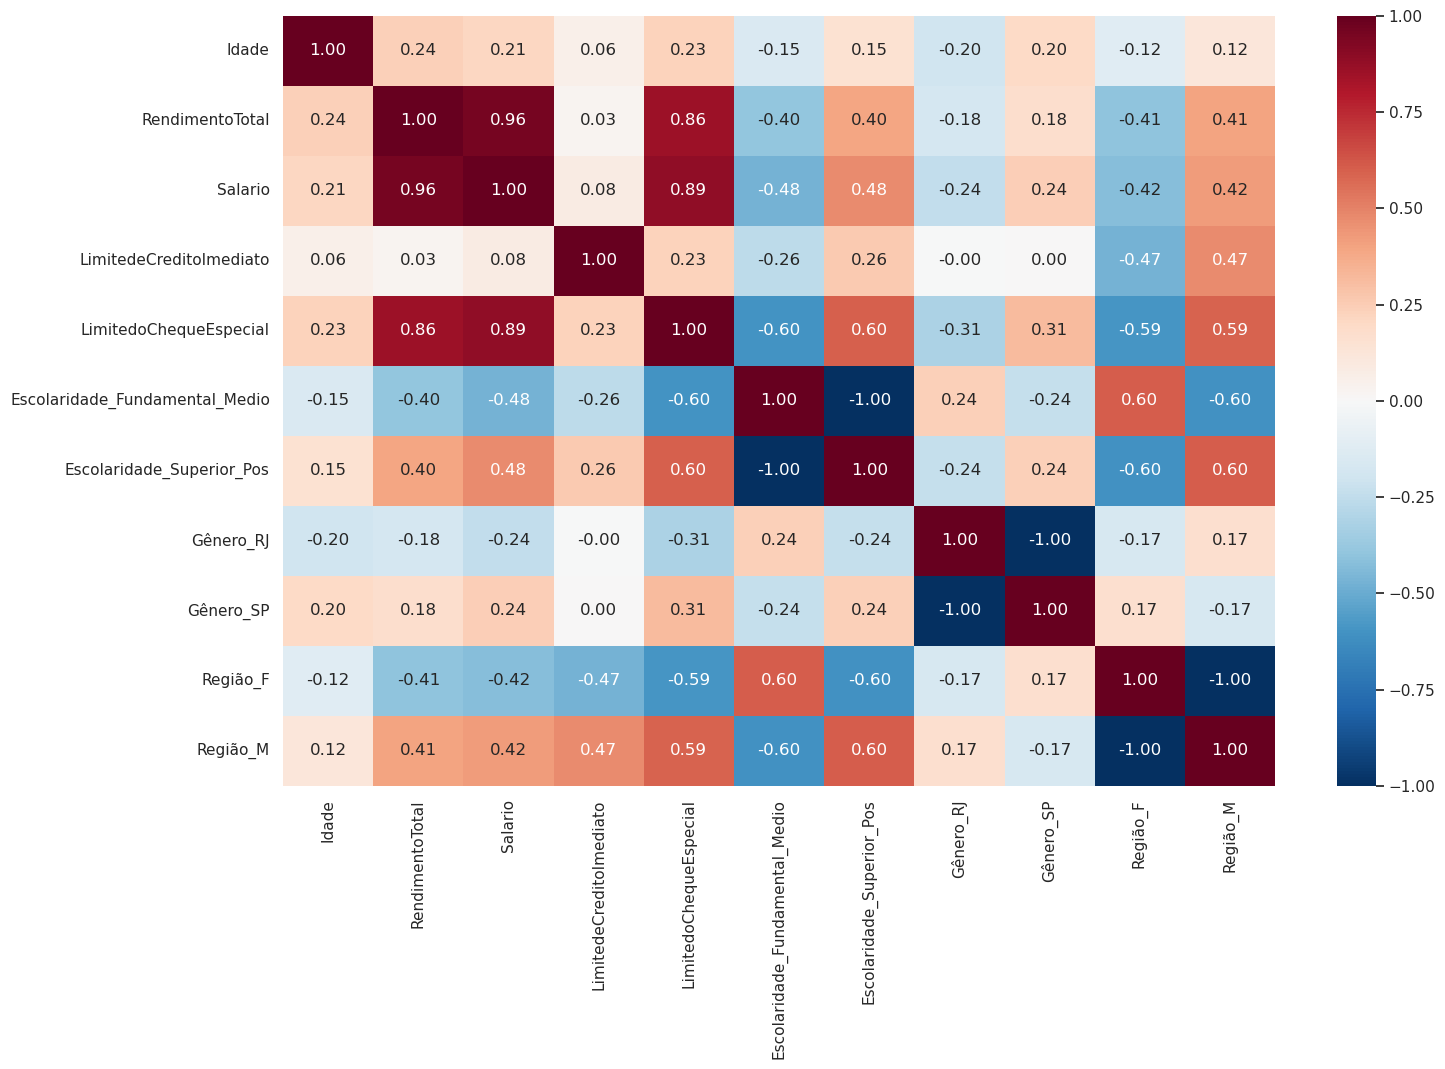

In [69]:
execício_variáveis_dummy_prática.gráfico_de_correlação_heatmap(dataframe=df_dummy)

In [70]:
df_dummy.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'LimitedoChequeEspecial', 'Escolaridade_Fundamental_Medio',
       'Escolaridade_Superior_Pos', 'Gênero_RJ', 'Gênero_SP', 'Região_F',
       'Região_M'],
      dtype='object')

In [71]:
execício_variáveis_dummy_prática.modelo_mrls(
    function='LimitedoChequeEspecial~Salario+Gênero_RJ+Gênero_SP+Região_F+Região_M-1',
    dataframe=df_dummy
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Fri, 02 Jun 2023   Prob (F-statistic):           3.24e-20
Time:                            20:46:24   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salario     

# Regressão Linear simples com Scikit-Learn:

### Código:

In [72]:
class RegressãoLinearComScikitLearn():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_a_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)

        plt.show()

    def identificando_outliers(self, dataframe):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        sns.boxplot(data=dataframe)
        plt.show()

    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão - Tempo x Venda")
        plt.show()

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe
    
    def normalizando_os_dados(self, dataframe):
        scaler = StandardScaler()
        dataframe = pd.DataFrame(
            scaler.fit_transform(dataframe), 
            index=dataframe.index, 
            columns=dataframe.columns
        )
        return dataframe

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test
    
    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

    def gráfico_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    

if __name__ == '__main__':
    regressão_linear_com_scikit_learn = RegressãoLinearComScikitLearn()

### Output:

In [73]:
display(df_imoveis.head())

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [74]:
df_imoveis.columns

Index(['area', 'preco'], dtype='object')

In [75]:
regressão_linear_com_scikit_learn.verificando_as_dimensões_do_dataframe(dataframe=df_imoveis)

Linhas: 54 
Colunas: 2


In [76]:
regressão_linear_com_scikit_learn.descrição(dataframe=df_imoveis)

,area,preco
count,54.00,54.00
mean,457.48,41296.30
std,261.53,16488.57
min,293.22,20000.00
25%,355.09,30000.00
50%,380.36,40000.00
75%,470.09,50000.00
max,2057.57,120000.00


In [77]:
regressão_linear_com_scikit_learn.verificando_tipos(dataframe=df_imoveis)

,Tipos
area,float64
preco,int64


In [78]:
regressão_linear_com_scikit_learn.verificando_valores_nulos(dataframe=df_imoveis)

,Quantidade,Porcentagem
area,0,0.0
preco,0,0.0


In [79]:
regressão_linear_com_scikit_learn.verificando_valores_duplicados(dataframe=df_imoveis)

,Quantidade,Porcentagem
area,0,0.00%
preco,43,79.63%


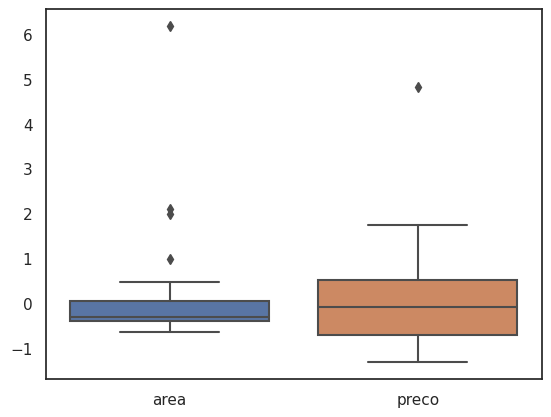

In [80]:
regressão_linear_com_scikit_learn.identificando_outliers(dataframe=df_imoveis)

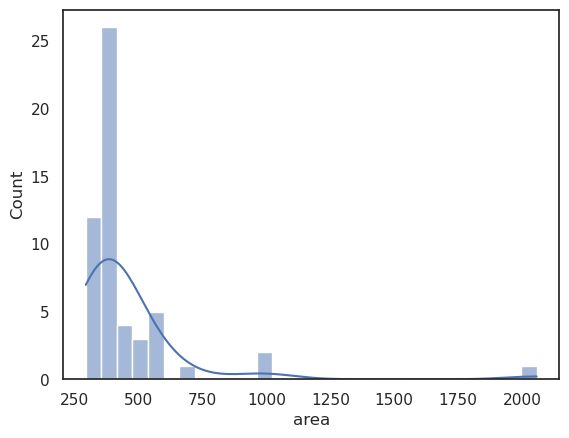

In [81]:
regressão_linear_com_scikit_learn.verificando_a_distribuição(dataframe=df_imoveis, coluna='area')

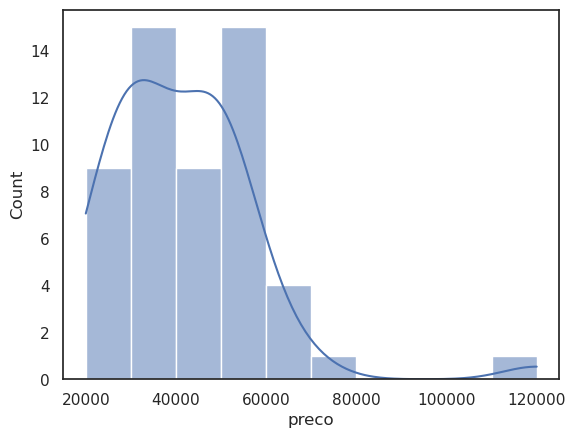

In [82]:
regressão_linear_com_scikit_learn.verificando_a_distribuição(dataframe=df_imoveis, coluna='preco')

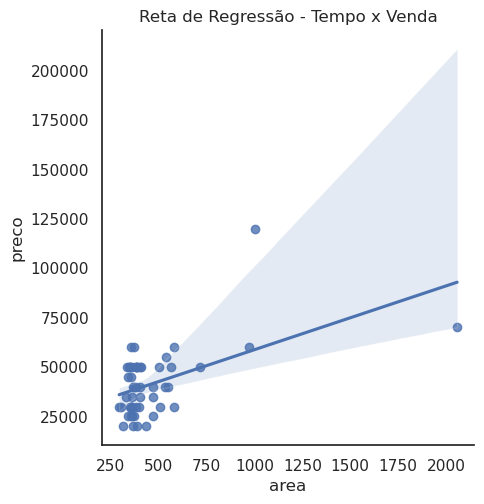

In [83]:
regressão_linear_com_scikit_learn.gráfico_de_reta_linear(dataframe=df_imoveis, x='area', y='preco')

In [84]:
regressão_linear_com_scikit_learn.verificando_correlação(dataframe=df_imoveis)

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


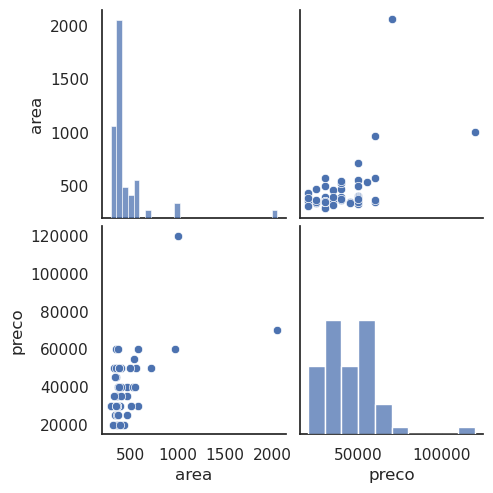

In [85]:
regressão_linear_com_scikit_learn.gráfico_de_correlação_pairplot(dataframe=df_imoveis)

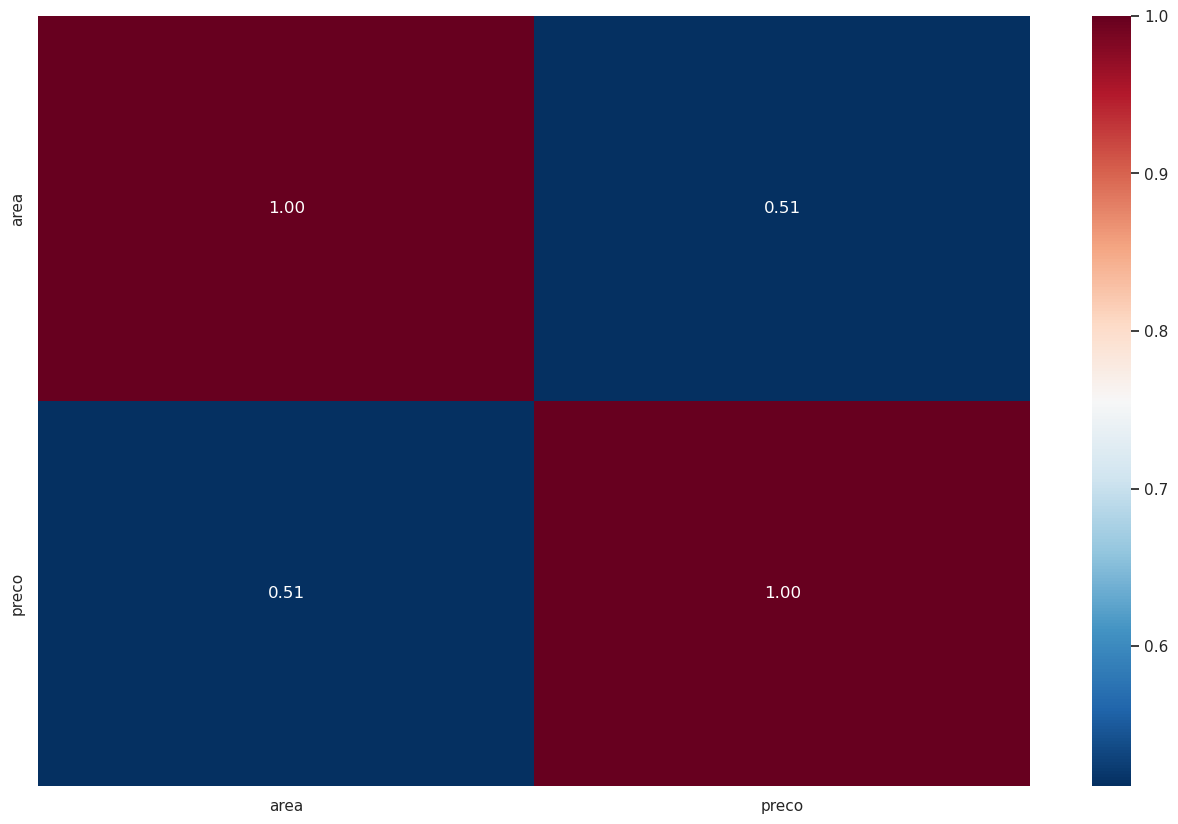

In [86]:
regressão_linear_com_scikit_learn.gráfico_de_correlação_heatmap(dataframe=df_imoveis)

In [87]:
df_imoveis_normalizando = regressão_linear_com_scikit_learn.normalizando_os_dados(dataframe=df_imoveis)

In [88]:
regressão_linear_com_scikit_learn.modelo_mrls(
    function = 'preco~area-1',
    dataframe=df_imoveis_normalizando
)

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.248
Method:                 Least Squares   F-statistic:                              18.77
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                    6.61e-05
Time:                        20:46:27   Log-Likelihood:                         -68.438
No. Observations:                  54   AIC:                                      138.9
Df Residuals:                      53   BIC:                                      140.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
treinamento, y_pred, y_test = regressão_linear_com_scikit_learn.treinamento(
    dataframe= df_imoveis_normalizando,
    x='preco',
    y='area'
)

Coeficiente de Determinação (R²): 0.26489872938383896


In [90]:
regressão_linear_com_scikit_learn.metricas_do_modelo(
    y_true=y_test,
    y_pred=y_pred
)

MAE: 0.4478669714243303
MSE: 0.31018974108203007
RMSE: 0.5569468027397501


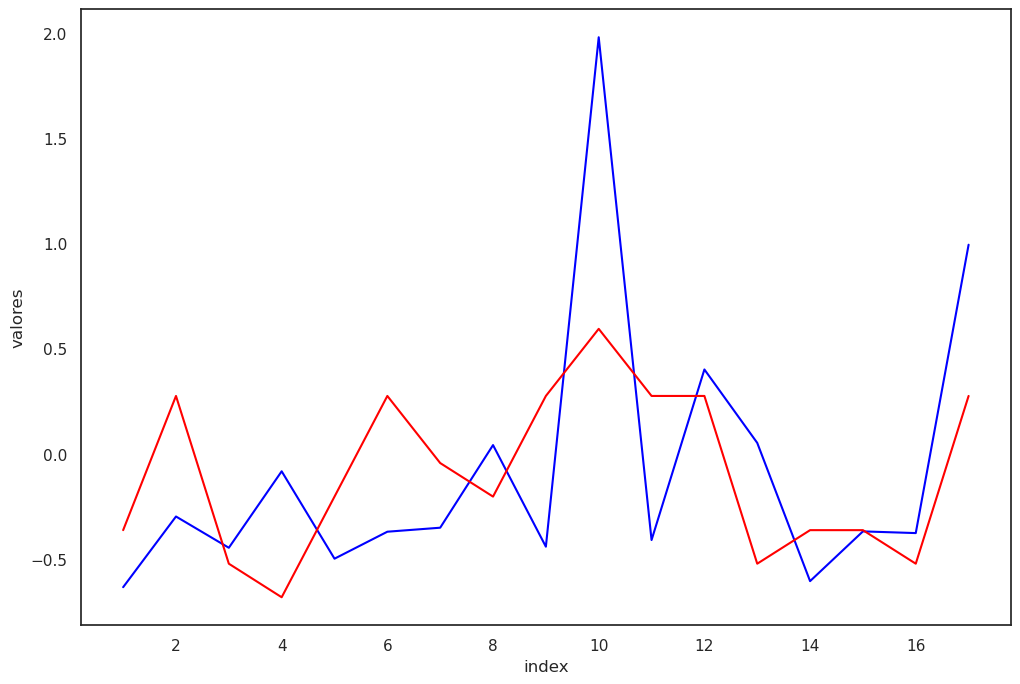

In [91]:
regressão_linear_com_scikit_learn.gráfico_de_linha(
    y_true=y_test,
    y_pred=y_pred
)

## Execício:

### Código:

In [92]:
class ExercíciosRegressãoLinearComScikitLearn():
    def normalizando_os_dados(self, dataframe):
        scaler = StandardScaler()
        dataframe = pd.DataFrame(
            scaler.fit_transform(dataframe), 
            index=dataframe.index, 
            columns=dataframe.columns
        )
        return dataframe
    # Modeling:
    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'r_quadrado: {r2}')

        return treinamento, y_pred, y_test
    
    def gráfico_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        print(y_pred)
        return y_pred

    def resumo_do_modelo(self, modelo):
        print(modelo.summary())

if __name__ == '__main__':
    exercícios_regressão_linear_com_scikit_learn = ExercíciosRegressãoLinearComScikitLearn()

In [93]:
display(df_aprovados.head())

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [94]:
df_aprovados_normalizado = exercícios_regressão_linear_com_scikit_learn.normalizando_os_dados(
    dataframe=df_aprovados
)

In [95]:
treinamento, y_pred, y_test = exercícios_regressão_linear_com_scikit_learn.treinamento(
    dataframe= df_aprovados_normalizado,
    x='ano_2015',
    y='ano_2016'
)

r_quadrado: 0.9202546516340642


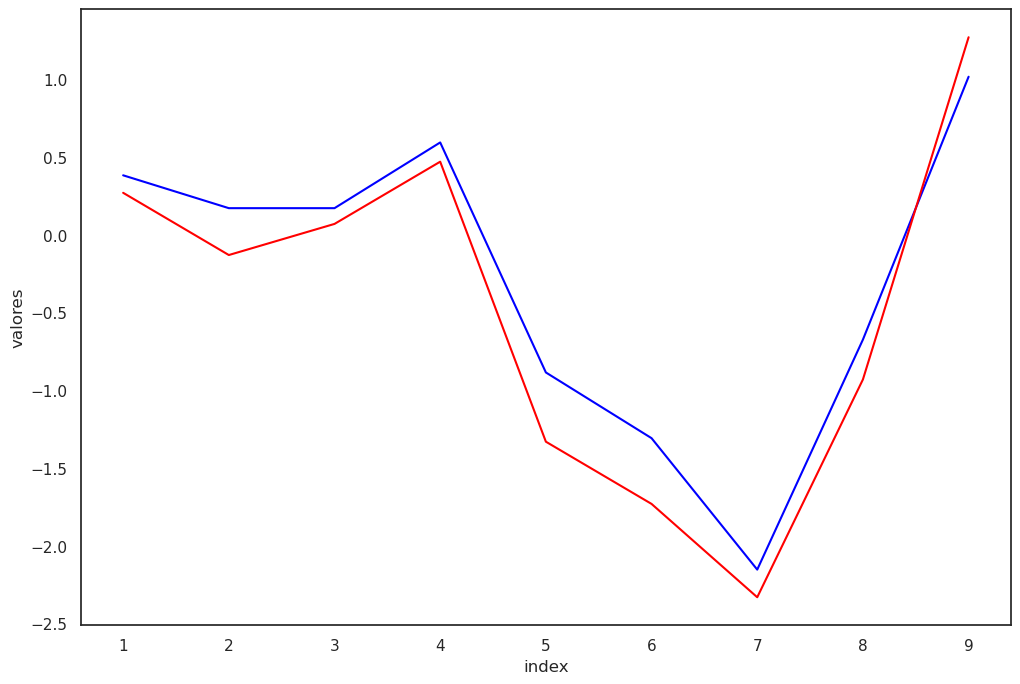

In [96]:
exercícios_regressão_linear_com_scikit_learn.gráfico_de_linha(
    y_true=y_test,
    y_pred=y_pred
)

In [97]:
# exercícios_regressão_linear_com_scikit_learn.previsão
# exercícios_regressão_linear_com_scikit_learn.resumo_do_modelo

# Regressão Linear Múltipla com Scikit-Learn:

### Código:

In [98]:
class RegressãoLinearMúltiplaComScikitLearn():
    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def gráfico_de_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)

        plt.show()

    def normalizando_os_dados(self, dataframe):
        scaler = StandardScaler()
        dataframe = pd.DataFrame(
            scaler.fit_transform(dataframe), 
            index=dataframe.index, 
            columns=dataframe.columns
        )
        return dataframe

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[[y]],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test
    
    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

    def gráfico_de_linha_plot(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()


if __name__ == '__main__':
    regressão_linear_mútipla_com_scikit_learn = RegressãoLinearMúltiplaComScikitLearn()

### Output:

In [99]:
display(df_limit_dymmy.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000
5,35,5000,5000,1000,1000
6,80,8100,8100,3500,1000
7,66,4800,4800,440,1500
8,39,6320,6320,1550,1640
9,47,5000,5000,2000,1700


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt